# Keras quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://keras.io/about/"><img src="https://keras.io/img/logo-small.png" /></a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

Run this tutorial in a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. After uploading a notebook, Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

## Set up Keras

Import Keras into your program to get started:

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

## Load and Prepare a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [6]:
# 1. Load and Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to 28*28 for Flatten layer
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalize 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Plot (optional)

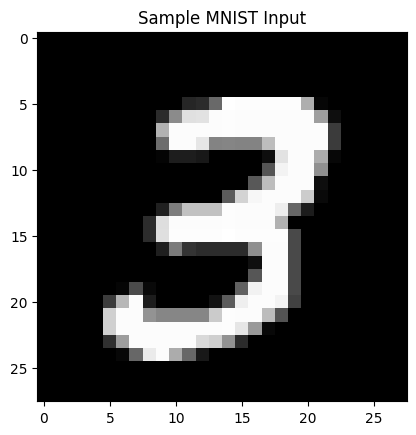

In [7]:
# Sample index to display (pick whichever sample you want)
sample_index = 7

# Extract a sample image 
sample_image = x_train[sample_index]

# Display the sample using matplotlib
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Sample MNIST Input')
plt.show()

## Build a machine learning model

Build a `Sequential` model:

In [8]:
# 2. Define the Model 
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten input
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most Neural Network models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

## Compile a model with loss / optimizer / metrics

Define a loss function for training using `categorical_crossentropy`.

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `categorical_crossentropy`, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [10]:
# 3. Compile the Model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [11]:
# 4. Train the Model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


938/938 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.9223 - val_loss: 0.1370 - val_accuracy: 0.9593
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1138 - accuracy: 0.9655 - val_loss: 0.0905 - val_accuracy: 0.9713
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.0922 - val_accuracy: 0.9716
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0590 - accuracy: 0.9813 - val_loss: 0.0863 - val_accuracy: 0.9732
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0914 - val_accuracy: 0.9733
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0865 - val_accuracy: 0.9762
Epoch 8/10
938/93

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [12]:
evaluation = model.evaluate(x_test, y_test)
print('Test Loss:', evaluation[0])
print('Test Accuracy:', evaluation[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9750
Test Loss: 0.09999710321426392
Test Accuracy: 0.9750000238418579


The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [Tensorflow tutorials](https://www.tensorflow.org/tutorials/).

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
